<a href="https://colab.research.google.com/github/ShKSGithub/Data-Analysis-with-Python/blob/main/Chapter_6/My_DA_Ch_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/MOOCs/Data Analysis with Python/Chapter_6

/content/gdrive/MyDrive/Colab Notebooks/MOOCs/Data Analysis with Python/Chapter_6


# **Chapter 6**


## Topic 6.1
The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read hdf5 file
nsfg = pd.read_hdf('nsfg.hdf5','nsfg')

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

In [ ]:
# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [ ]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [ ]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
print('Value counts:\n',nsfg['nbrnaliv'].value_counts())

Value counts:
 1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [ ]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [ ]:
# Select the columns ['agecon','agepreg'] and divide by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

In [ ]:
# Compute the difference of agecon from agepreg  
preg_length = agepreg - agecon 

In [ ]:
# Compute summary statistics
print('Summary statistics:\n',preg_length.describe())

Summary statistics:
 count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


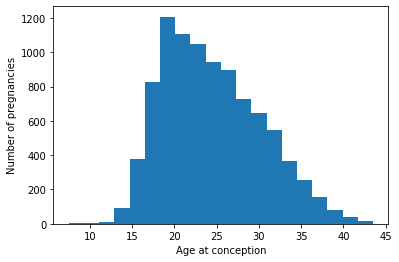

In [ ]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

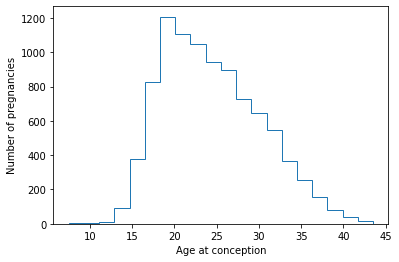

In [ ]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype = 'step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [ ]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >=37

full_term

0        True
1       False
2       False
3       False
4        True
        ...  
9353    False
9354     True
9355    False
9356     True
9357     True
Name: prglngth, Length: 9358, dtype: bool

In [ ]:
# Filter single births
single = nsfg['nbrnaliv'] == 1

single.head()

0     True
1     True
2     True
3    False
4     True
Name: nbrnaliv, dtype: bool

# **Chapter 6**



## Topic 6.2

You'll learn how to represent distributions using Probability distributions.

In [ ]:
# Information about pandas
!pip3 show --files pandas

Name: pandas
Version: 1.1.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: pytz, python-dateutil, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, altair
Files:
  pandas-1.1.5.dist-info/AUTHORS.md
  pandas-1.1.5.dist-info/INSTALLER
  pandas-1.1.5.dist-info/LICENSE
  pandas-1.1.5.dist-info/METADATA
  pandas-1.1.5.dist-info/RECORD
  pandas-1.1.5.dist-info/WHEEL
  pandas-1.1.5.dist-info/entry_points.txt
  pandas-1.1.5.dist-info/top_level.txt
  pandas/__init__.py
  pandas/__pycache__/__init__.cpython-36.pyc
  pandas/__pycache__/_testing.cpython-36.pyc
  pandas/__pycache__/_typing.cpython-36.pyc
  pandas/

In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read hdf5
gss = pd.read_hdf('gss.hdf5', 'gss')

# Select head
gss.head()
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

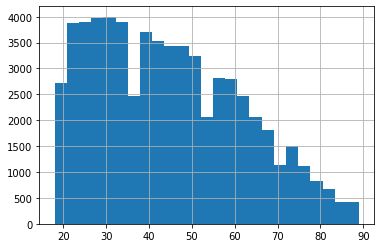

In [ ]:
# Histogram of age column
gss['age'].hist(bins=25)

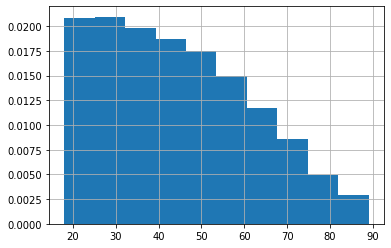

In [ ]:
gss['age'].hist(density= True, weights= None, cumulative= False, bottom= None, histtype= 'bar')

In [ ]:
# Select columns
columns = ['age', 'year', 'educ']
subset = gss[columns]

# Compute the correlation matrix
print('Correlation of selected columns:\n',subset.corr())

Correlation of selected columns:
            age      year      educ
age   1.000000  0.065482 -0.153742
year  0.065482  1.000000  0.214065
educ -0.153742  0.214065  1.000000


In [ ]:
# Age column
age = gss[['age']]

# Year column
year = gss[['year']]

### **KDE**
In statistics, kernel density estimation (KDE) is a non-parametric way 
to estimate the probability density function (PDF) of a random variable. 
This function uses Gaussian kernels and includes automatic bandwidth determination.

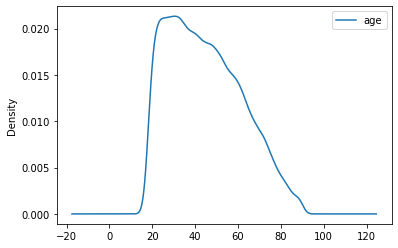

In [ ]:
# Plotting KDE of age column
age.plot.kde()
plt.show()

The method used to calculate the estimator bandwidth. This can be ‘scott’,
 ‘silverman’, a scalar constant or a callable. If None (default), ‘scott’ is used.

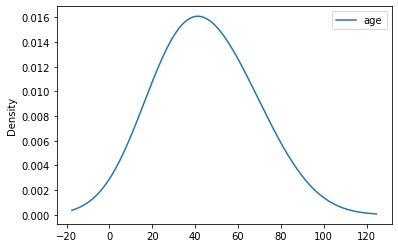

In [ ]:
age.plot.kde(bw_method=1)
plt.show()

In [ ]:
age = gss[['age']]

In [ ]:
# Histogram of age and year
plt.hist(age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [ ]:
year= gss['year']

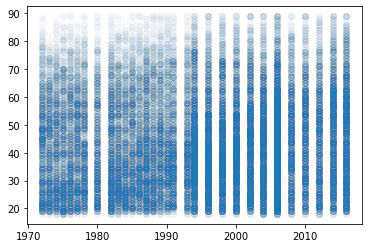

In [ ]:
# Make a scatter plot
plt.plot(year, age, 'o', alpha=0.01)
plt.show()

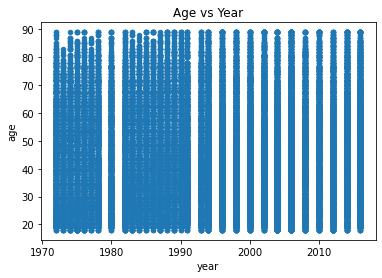

In [ ]:
# Show the scatter plot after some modifications
gss.plot(x= 'year', y= 'age', kind= 'scatter', title= 'Age vs Year')
plt.show()

# **Chapter 6**

## Topic 6.3

Explore multivariate relationships using multiple regression to 
describe non-linear relationships and logistic regression to explain 
and predict binary variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Read hdf5
brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Select head
display('Head of data:\n',brfss.head())

print('-' * 100)

# Show columns
print('Columns of file:\n',brfss.columns)

'Head of data:\n'

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


----------------------------------------------------------------------------------------------------
Columns of file:
 Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')


In [ ]:
# Sum of all null values
brfss.isnull().sum()

SEX            62
HTM4         4857
WTKG3        6596
INCOME2     16553
_LLCPWT         0
_AGEG5YR     1206
_VEGESU1    12287
_HTMG10      4857
AGE          1206
dtype: int64

In [ ]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Drop null vlaues in required columns
subset = brfss.dropna(subset=['INCOME2','_VEGESU1'])

# Independent variable
xs = subset['INCOME2']

# Dependent variable
ys = subset['_VEGESU1']

# Run regression with linregress
res = linregress(xs, ys)
print('Linear Regression using Scipy:\n',res, '\n','-'*70) 

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print('Linear regression using Stats model:\n',results.params)

Linear Regression using Scipy:
 LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332) 
 ----------------------------------------------------------------------
Linear regression using Stats model:
 Intercept    1.528779
INCOME2      0.069880
dtype: float64


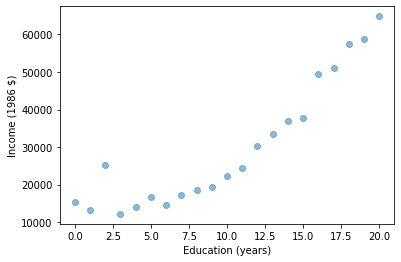

In [ ]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income of each group with respect to 'realinc' 
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5, )

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [ ]:
# Columns in gss
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

# Add new columns named as educ squared and age squared
gss['educ2'] = gss['educ'] ** 2
gss['age2'] = gss['age']**2

# Run a regression model (Multi-linear regression) with educ, educ2, age and age2
results= smf.ols('realinc ~ educ + educ2 + age +age2', data = gss).fit()

# Print the estimated parameters
print('Intercept and Coefficients of Multi-linear regression model:\n',results.params)

Intercept and Coefficients of Multi-linear regression model:
 Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [ ]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2 ', data = gss).fit()

# Make the DataFrame for predictions
df = pd.DataFrame()
df['educ'] = np.linspace(start=0, stop=20)
df['age'] = 30
df['educ2'] = df['educ'] ** 2
df['age2'] = df['age'] ** 2

display(df.head())

# Generate the predictions
pred= results.predict(df)
print('-'* 70,'\nPredictions on the dataframe:\n',pred.head())

,educ,age,educ2,age2
0,0.000000,30,0.000000,900
1,0.408163,30,0.166597,900
2,0.816327,30,0.666389,900
3,1.224490,30,1.499375,900
4,1.632653,30,2.665556,900


---------------------------------------------------------------------- 
Predictions on the dataframe:
 0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


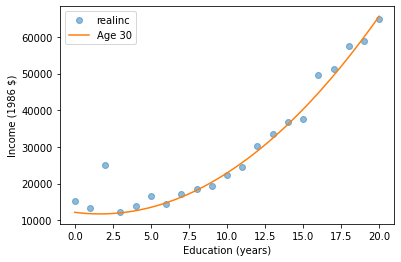

In [ ]:
# Plot mean income in each Educ group (Similar to above)
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5, label = 'realinc')

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'],pred, label = 'Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [ ]:
# Recode grass
gss['grass'].replace(2, 0 , inplace = True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params 

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

https://www.statsmodels.org/dev/example_formulas.html